> This assignment as two parts Section A and B. The first part is the implementation of function required in applying the CNN layers and the next section will be around the use of built in function of Tensorflow



`Before moving ahead as we have reached the stage of applying CNNs. We are going to deal with large number of parameters and hence more computational power. So you will need to connect runtime of collab to GPU: https://www.youtube.com/watch?v=-9CLfrZISRw`

### **BOTH THE SECTION CAN BE SOLVED INDEPENDENTLY** BUT SECTION A has **3X** more weightage than SECTION B doesn't have any code to write.

## **SECTION:A**

In [1]:
import numpy as np

### Q1: Complete the following function corr2d(X, K), which implements the cross correlation operation for matrix X and kernel K, both are two dimensional numpy arrays (height x width). The function should return a 2 dimensional numpy array which is the result of cross correlation operation between X and K. 

- not giving channels right now : assume channels = 1

In [2]:
def corr2d(X: np.array, K: np.array) -> np.array:
    # no padding for now and assume stride = 1
  array = []
  i = 0
  for x in range(len(X)-len(K)+1) :
    for y in range(len(X.T)-len(K.T)+1) :
      part = X[x:x+len(K),y:y+len(K.T)] #correct x:x+len(K)
      part2 = part*K #correct
      array.insert(i,np.sum(part2))
      i +=1

  array = np.reshape(array,(len(X)-len(K)+1,len(X.T)-len(K.T)+1))
  return array

In [3]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
K = np.array([[0.0, 1.0], [2.0, 3.0]], dtype=np.float32)
#len(X)
#part = X[0:2,0:2]
#print(part*K)
print(corr2d(X, K)) # example done in class, try to print this and check if you get the right answer

[[19. 25.]
 [37. 43.]]


### now try to make a new function corr2d_multiple_input_channels(X, K) : where each X and K have the same number of channels, both of them are now 3 dimensional numpy arrays, the output should be a 2 dimensional numpy array (output_h, output_w).

- hint : Use the above corr2d function and read about np.stack

In [4]:
def corr2d_multiple_input_channels(X: np.array, K: np.array) -> np.array: 
    # write a function for this task
    #what is output_h and output_w??
    
    a3d = []
    i = 0
    for index in range(len(X)) :
      a = X[index]
      b = K[index]
      a3d.insert(index,corr2d(a,b))
    return np.sum(a3d, axis = 0)
    


In [5]:
new_X = np.stack([X, X+1, X+2], axis=0) # stacking along a new dimension
new_K = np.stack([K, K+1, K+2], axis=0) 

print(f"new_X.shape = {new_X.shape}, new_K.shape = {new_K.shape}")
print(corr2d_multiple_input_channels(new_X, new_K))
# calculate the output by hand and then check whether you get the same answer correct
# answer should be a 2 dim np array : (output_height, output_width) correct

new_X.shape = (3, 3, 3), new_K.shape = (3, 2, 2)
[[119. 149.]
 [209. 239.]]


### Write another function corr2d_mutli_in_out(X, K): where X (3 dim np array), K (4 dim numpy array), 0th dimension of K represents the number of kernel/filters we are using. Perform the cross correlation operation for K on X and return the output : 3 dim numpy array whose shape should be (num_output_channels, output_height, output_width)

- hint : use the above corr_2d_mutliple_input_channels(X, K) for each kernel in K and then stack them.

In [6]:
def corr2d_multi_in_out(X: np.array, K: np.array) -> np.array:
    # X -> (num_in_channels, n_h, n_w)
    # K -> (num_out_channels, num_in_channels, k_h, k_w)
    # output -> (num_out_channels, o_h, o_w)
    arr = []
    i = 0
    for index in range(len(K)) :
      y = K[index]
      v = corr2d_multiple_input_channels(X,y)
      arr.insert(i,v)
      i += 1
    return np.stack(arr)

In [7]:
my_K = np.stack([new_K, new_K+1, new_K+2, new_K + 3], axis=0) 
print(f"my_K.shape = {my_K.shape}")

print(corr2d_multi_in_out(new_X, my_K)) # cross check the calculation

my_K.shape = (4, 3, 2, 2)
[[[119. 149.]
  [209. 239.]]

 [[155. 197.]
  [281. 323.]]

 [[191. 245.]
  [353. 407.]]

 [[227. 293.]
  [425. 491.]]]


### Q2: What is the computational and statistical benefits of stride larger than 1?? (not more than 20 word answer for each)

### Q3: Now let's implement a model with just a single convolution layer, given X(input), Y(output) and K(kernel). Y is the output of the cross-correlation operation of K on X. You need to build a model to learn that kernel K.(try to print the kernel at each epoch)

- hint : conv_layer(output_channels = 1, input_channels = 1, kerenl_size=(1, 2), bias=False)

In [8]:
X = np.ones((6, 8), dtype=np.float32)
X[:, 2:6] = 0
print(X)

[[1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]]


In [9]:
K = np.array([1.0, -1.0], dtype=np.float32) # kernel, you need to learn this using a model
K = K.reshape(1,2)
Y = corr2d(X, K) 
print(Y)
#print(X.shape)
#print(K.shape)
#print(K)

[[ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]]


In [10]:
X = X.reshape((1, 1, 6, 8)) # this will be the input to the model
Y = Y.reshape((1, 1, 6, 7)) # this is the output, to be used while calculation loss
lr = 0.03 #3e-2 # use this learning rate
#model = models.Sequential()


### Q4: Complete the following function max_pool2d(X, K) which performs maxpooling with kernel size K on X and returns and two dim numpy array

In [11]:
def max_pool2d(X: np.array, K: tuple) -> np.array:
    # write a function for this job
    arr= []
    
    i=0
    p , q = X.shape
    h , w = K
    
    for y in range(h) :
      for x in range(w) :
        t = X[y:y+h,x:x+w] #x:x+w
        arr.insert(i,np.max(t))
        i += 1
    return np.reshape(arr, (p-h+1,q-w+1))
#model = models.Sequential()


In [12]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
#y = X[0,0:2]
#t = y*(2,2)
#print(t)
max_pool2d(X, (2, 2)) # check if the output matches with your calculation

array([[4., 5.],
       [7., 8.]], dtype=float32)

# **SECTION:B**



### **JUST RUN THE CELLS AND VISUALIZE**( Nothing to code 🙂 )

> Indented block



In [13]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [14]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

170498071/170498071 [==============================] - 2s 0us/step


In [15]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(35000, 32, 32, 3)
(15000, 32, 32, 3)
(35000, 1)
(15000, 1)


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


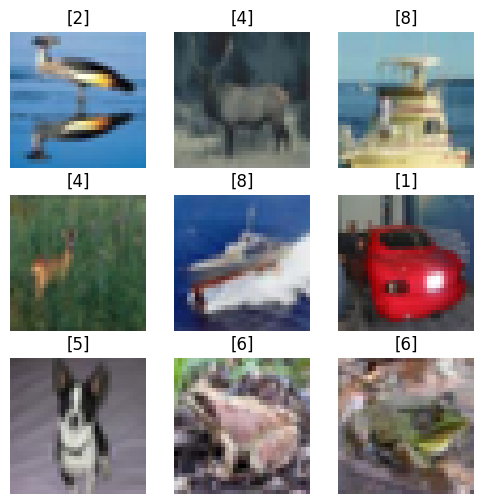

In [16]:
#Lets visualize the CIFAR-10 dataset

import random
figure = plt.figure(figsize=(6,6))

for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[index])
  plt.title(Y_train[index])
  plt.axis(False)

In [17]:
"""
So you can probably notice here that the images are 3D(coloured) but still 
not of great quality ( what can you expect from 32x32 image). Also there are
certain other factors which makes the classification a bit tougher than the 
cases of 2D( the digit and the fashion data) you dealt before. We will try to
understand the difficulties and find probable solution for them.
"""

'\nSo you can probably notice here that the images are 3D(coloured) but still \nnot of great quality ( what can you expect from 32x32 image). Also there are\ncertain other factors which makes the classification a bit tougher than the \ncases of 2D( the digit and the fashion data) you dealt before. We will try to\nunderstand the difficulties and find probable solution for them.\n'

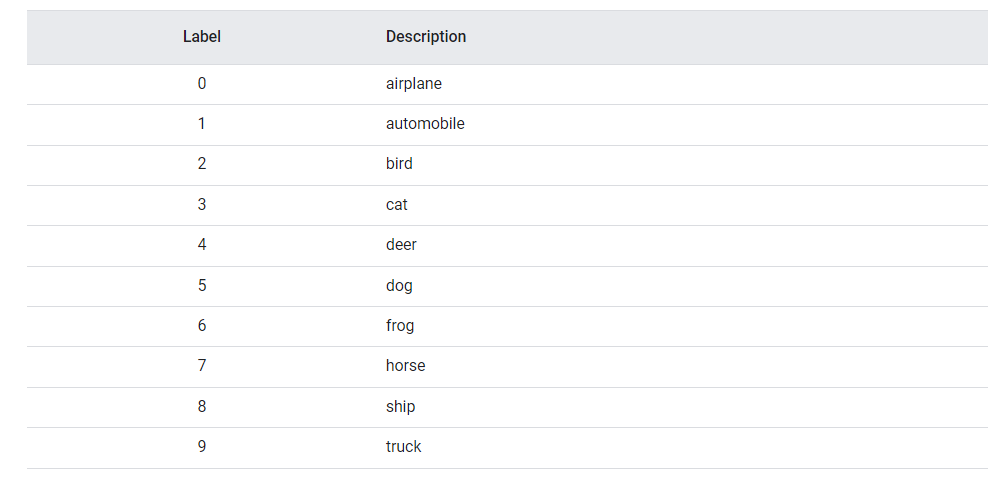

In [18]:
"""
Lets first start with the CNN model discussed in the class for digit
 classification. Notice that I have changed the input shape for this usecase.
 Earlier it was (28,28,1) for the digit dataset.
"""

'\nLets first start with the CNN model discussed in the class for digit\n classification. Notice that I have changed the input shape for this usecase.\n Earlier it was (28,28,1) for the digit dataset.\n'

In [19]:
# model initialization
cnn_model = tf.keras.Sequential()

# adding the 1st layer of CNN
cnn_model.add(tf.keras.layers.Conv2D(26, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#adding another CNN layer
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [20]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [21]:
"""
Explain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]

Answer: 


        
        Adam(Adaptive Moment Estimation) is a stochastic gradient descent method. It is the latest version of all gradient descent optimizers. 
        it is efficient and occupies less memory. it is a combination of 'Gradient descent with momentum' and 
        'Root Mean Square propagation(RMSP)'.

        momentum algorithm : so it just takes exponential wieghted average into consideration cause it makes 
                             the algorithm to converge to minima of cost function faster.

        RMSP : Instead of taking cumulative sum of squared gradients it takes 'exponential moving average'. 
               In simple words a moving average gives an intuition about the past by averaging out the experience
               which is captured in data points. moving average is a tool to determine the direction of a trend.

        here we take bigs steps towards minima when we are far, and take small steps as we converge more towards it.


        SOURCES - https://www.geeksforgeeks.org/intuition-of-adam-optimizer/
                  https://medium.com/analytics-vidhya/understanding-exponential-moving-averages-e3f020d9d13b

        
"""

"\nExplain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]\n\nAnswer: \n\n\n        \n        Adam(Adaptive Moment Estimation) is a stochastic gradient descent method. It is the latest version of all gradient descent optimizers. \n        it is efficient and occupies less memory. it is a combination of 'Gradient descent with momentum' and \n        'Root Mean Square propagation(RMSP)'.\n\n        momentum algorithm : so it just takes exponential wieghted average into consideration cause it makes \n                             the algorithm to converge to minima of cost function faster.\n\n        RMSP : Instead of taking cumulative sum of squared gradients it takes 'exponential moving average'. \n               In simple words a moving average gives an intuition about the past by averaging out the experience\n               which is captured in data points. moving average is a tool to determine the direction of a trend.\n\n        here we take bigs steps t

### **Make sure that you are connected to GPU runtime other wise the training in next cell is going to take a long time**

In [22]:
history = cnn_model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


875/875 [==============================] - 22s 7ms/step - loss: 2.4798 - accuracy: 0.0984 - val_loss: 2.3028 - val_accuracy: 0.1004
Epoch 2/10
875/875 [==============================] - 6s 7ms/step - loss: 2.3012 - accuracy: 0.1005 - val_loss: 2.3026 - val_accuracy: 0.0986
Epoch 3/10
875/875 [==============================] - 5s 6ms/step - loss: 2.3007 - accuracy: 0.1037 - val_loss: 2.3059 - val_accuracy: 0.0980
Epoch 4/10
875/875 [==============================] - 6s 7ms/step - loss: 2.2985 - accuracy: 0.1045 - val_loss: 2.3026 - val_accuracy: 0.0974
Epoch 5/10
875/875 [==============================] - 5s 6ms/step - loss: 2.2977 - accuracy: 0.1055 - val_loss: 2.3010 - val_accuracy: 0.0993
Epoch 6/10
875/875 [==============================] - 6s 7ms/step - loss: 2.2984 - accuracy: 0.1059 - val_loss: 2.3015 - val_accuracy: 0.0981
Epoch 7/10
875/875 [==============================] - 5s 6ms/step - loss: 2.2973 - accuracy: 0.1042 - val_loss: 2.3107 - val_accuracy: 0.1041
Epoch 8/10
875/8

In [23]:
""" 
Write about validation accuracy in 100 words.

Answer: Validtion set plays an important role in training our model, it is used for assessing the model, monitor the improvement. it also help us to decide when to halt the training process.
        accuracy means percenatge of predicted(Y_pred) values matching with actuall values (Y_actual)
        Validation accuracy -- Accuracy on data set you did not use for training, thus this checks the generality of our model and helps early stopping.
                               so instead of checking our model by training it on a very large data set (which might lead to to its overtraining), we train it 
                               on small data set. The model is not trained on the validation dataset but is evaluated on it.

        Early Stopping -- it is a method that allows us to specify a large number of training epochs and stop then training once our models performance stops improving.
                          early stopping requires a validation dataset to be evaluated during training.

SOURCES: https://stats.stackexchange.com/questions/401696/validation-accuracy-vs-testing-accuracy#:~:text=In%20other%20words%2C%20the%20test,or%20for%20%22early%20stopping%22.
         https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/#:~:text=Early%20stopping%20is%20a%20method,deep%20learning%20neural%20network%20models.
         https://towardsdatascience.com/keras-accuracy-metrics-8572eb479ec7#:~:text=Accuracy%20calculates%20the%20percentage%20of,the%20total%20number%20of%20records.

"""

' \nWrite about validation accuracy in 100 words.\n\nAnswer: Validtion set plays an important role in training our model, it is used for assessing the model, monitor the improvement. it also help us to decide when to halt the training process.\n        accuracy means percenatge of predicted(Y_pred) values matching with actuall values (Y_actual)\n        Validation accuracy -- Accuracy on data set you did not use for training, thus this checks the generality of our model and helps early stopping.\n                               so instead of checking our model by training it on a very large data set (which might lead to to its overtraining), we train it \n                               on small data set. The model is not trained on the validation dataset but is evaluated on it.\n\n        Early Stopping -- it is a method that allows us to specify a large number of training epochs and stop then training once our models performance stops improving.\n                          early stoppin

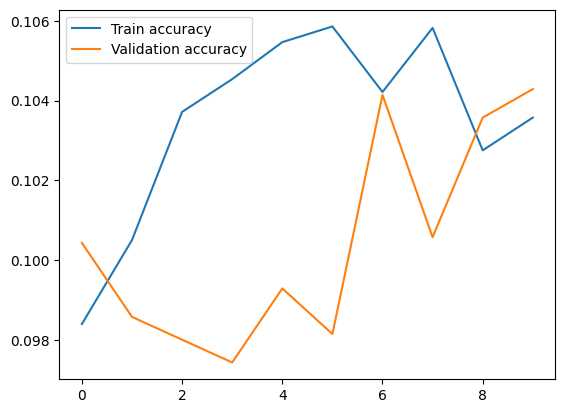

In [24]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [25]:
"""
What do you think is happening? Is the model training or not?
 You can see that both the training and validation accuracy are
 just roaming around 0.1. 
 One reason for this can be our model architecture. We had 26 filters
 in our first layer and 16 filters in our next layer. This funnel down approach
 works for dense layers but for Conv layers( which are good at feature extraction)
 we want them to extract more and more features.

 So lets change that to funne up --> 16 and 32 in the layers respectively
"""

'\nWhat do you think is happening? Is the model training or not?\n You can see that both the training and validation accuracy are\n just roaming around 0.1. \n One reason for this can be our model architecture. We had 26 filters\n in our first layer and 16 filters in our next layer. This funnel down approach\n works for dense layers but for Conv layers( which are good at feature extraction)\n we want them to extract more and more features.\n\n So lets change that to funne up --> 16 and 32 in the layers respectively\n'

In [26]:
# model initialization
cnn_model = tf.keras.Sequential()

"""adding the 1st layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

"""adding the 2nd layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(32, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [27]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [28]:
history = cnn_model.fit(X_train, Y_train, epochs=20, validation_split=0.2)

Epoch 1/20
875/875 [==============================] - 7s 6ms/step - loss: 2.2267 - accuracy: 0.2610 - val_loss: 1.8051 - val_accuracy: 0.3340
Epoch 2/20
875/875 [==============================] - 6s 7ms/step - loss: 1.7068 - accuracy: 0.3754 - val_loss: 1.6507 - val_accuracy: 0.3864
Epoch 3/20
875/875 [==============================] - 5s 6ms/step - loss: 1.5902 - accuracy: 0.4242 - val_loss: 1.5781 - val_accuracy: 0.4244
Epoch 4/20
875/875 [==============================] - 6s 6ms/step - loss: 1.5197 - accuracy: 0.4516 - val_loss: 1.5612 - val_accuracy: 0.4314
Epoch 5/20
875/875 [==============================] - 5s 6ms/step - loss: 1.4323 - accuracy: 0.4861 - val_loss: 1.5206 - val_accuracy: 0.4579
Epoch 6/20
875/875 [==============================] - 5s 6ms/step - loss: 1.3555 - accuracy: 0.5142 - val_loss: 1.5045 - val_accuracy: 0.4613
Epoch 7/20
875/875 [==============================] - 6s 7ms/step - loss: 1.3026 - accuracy: 0.5335 - val_loss: 1.4940 - val_accuracy: 0.4780
Epoch 

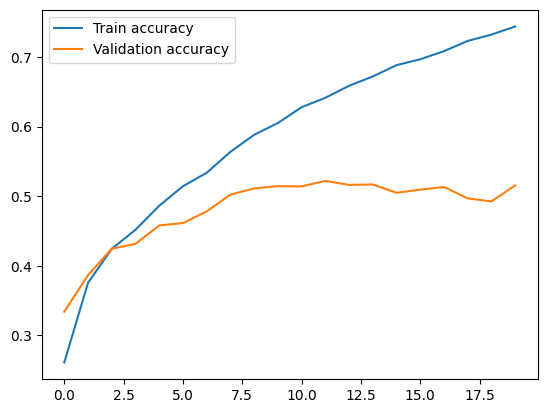

In [29]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [30]:
"""
Did our model improved??

Are we done with the job?

What is happening after 5( roughly ) epochs? Why is there a gap between
training and validation accuracy?

Our training accuracy reached to 0.73( and still increasing ) but 
the validation accuracy seems to stagnate at 0.52.

Is our model overfitting on the training data so much that it can't work well 
on unseen data.
"""

"\nDid our model improved??\n\nAre we done with the job?\n\nWhat is happening after 5( roughly ) epochs? Why is there a gap between\ntraining and validation accuracy?\n\nOur training accuracy reached to 0.73( and still increasing ) but \nthe validation accuracy seems to stagnate at 0.52.\n\nIs our model overfitting on the training data so much that it can't work well \non unseen data.\n"

In [31]:
"""
How are we gonna tackel this problem?
Well, we will see that in next part of this assignment.
Till then lets learn about about overfitting.
"""

'\nHow are we gonna tackel this problem?\nWell, we will see that in next part of this assignment.\nTill then lets learn about about overfitting.\n'

> **Well using Chatgpt to answer these question is something which everyone can think of right?? To create a difference write answer in your own terms after reading from web or reading the answer of Chatgpt.**
### **After all this is your midterm evaluation. Cheating is something we can catch easily** ( we have also done this )

In [32]:
"""
[CLARIFICATION]: Reading and understanding by searching on Chatgpt is not 
considered as cheating as long as you are writing that in your own word
( only problem is the crediblity of its information)

"""

'\n[CLARIFICATION]: Reading and understanding by searching on Chatgpt is not \nconsidered as cheating as long as you are writing that in your own word\n( only problem is the crediblity of its information)\n\n'

In [ ]:
"""
Question: What is overfitting and underfitting below ( atleast 200 words )

Answer: Overfitiing is an undesirable phenomenon during training our model, it is when our model can predict correctly on training data set but not in any other data set.
        thus overfitting makes our model useless. Overfitting occur when instead of generalizing, the model fits too close to data set.

        Reasons for overfitting
        1> training data is too small i.e, the model having scarcity of data is unable to generalize and do predictions for other inputs.
        2> training data is noisy, that is it contains faulty information.
        3> model is too complex that it learns the noise with the training data set
        4> model trains for too long this also leads to inability of model to generalize dataset.

        Underfitting is another type of error where the model cannot decide meaningful relationship between input and output data. Underfitting generally occurs when model is not
        trained for long time(appropiate) for large number of data points.
        more reasons for underfitting

        In underfitting the model has high bias whereas in overfitting the model has high variance-
        high bias - bias means by what amount the model is deviated from the final target. high bias includes more assumption about the target.
        high variance - it means that how much the models prediction deviate if any other dataset(than training) is used.

        REFERENCE - https://aws.amazon.com/what-is/overfitting/#:~:text=Overfitting%20is%20an%20undesirable%20machine,on%20a%20known%20data%20set.
                    https://www.simplilearn.com/tutorials/machine-learning-tutorial/overfitting-and-underfitting
                    https://www.mastersindatascience.org/learning/difference-between-bias-and-variance/#:~:text=A%20high%20bias%20model%20typically,which%20makes%20them%20learn%20fast.
"""

In [ ]:
"""
Question: What are regularization techniques in machine learning?(200 words)

Answer: Regularization is technique to overcome overfitting and underfitting. It caliberate the machine learning model to minimize the adjusted loss function.
        it reduces overfitting in a model by adding extra information to it. It can prevent the model learning noise fromm training dataset. This is done by 
        reducing the magnitude of variables that is we keep the number of features as it is but reduce there magnitude thus it maintains the accuracy and generalize 
        our model. Regularisation works by adding penalty term to a complex model. Regularization adds uncertainity and randomness to the model and thus makes it simple.

        there are two types of regualarization :

        1> Ridge regularization: It modifies the model by adding penalty equivalent to sum of squares of magnitudes of coefficients. this means that the mathematical function
                                 representing over model is minimized and coefficients are recalculated.

                                 cost function of ridge regression -- 

                                 CF = loss + x * sigma(||W||^2)
                                 loss = sum of squares of residuals
                                 x = penalty of error
                                 W = slope of the curve

                                 by changing the penalty term x we can change the amount by which we want to shrink our coefficients.
                                 Ridge regularization is also known as L2 regularisation.


        2> Lasso regularization: It modified the overfitted or underfitted model by adding sum of absolute values of coefficients as penalty. so instead of taking 
                                 the squares of the coefficients it now takes absolute value of sum of all coefficient so now it is a possibility that our penalty term is zero.

                                 CF = loss + x * sigma(||W||)
                                 loss = sum of squares of residuals
                                 x = penalty of error
                                 W = slope of the curve

SOURCES: https://www.simplilearn.com/tutorials/machine-learning-tutorial/regularization-in-machine-learning#:~:text=Regularization%20refers%20to%20techniques%20that,and%20prevent%20overfitting%20or%20underfitting.&text=Using%20Regularization%2C%20we%20can%20fit,reduce%20the%20errors%20in%20it.
         https://www.javatpoint.com/regularization-in-machine-learning
         https://medium.com/analytics-vidhya/why-regularization-a2ca00f8612c
                                 

"""

In [ ]:
"""
Question: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)

Answer: Drop out layer randomly sets input units to zero with frequency of a certain rate each step during trainig time which helps prevent overfitting.But this would lead to
        sum over other input to change and hence chane the models learning. to prevent this inputs are scale (input which are not set to 0) by a factor of (1/(1- rate)) to keep the 
        sum over other inputs unchanged. note that dropout layer only applies if training is set to true so that no value is dropped out during inference. this is obviusly because 
        you want randomness in modell to be introduced during the training(to overcome overfitting) not during the inference. trainig argument(set to true or false) let the layer to
        choose which path it should take. if training set to false it doesn't mean that it is not part of our network but is working in inference mode which means no dropout will ne applied.
        
"""

In [ ]:
"""
Question: What is L1 normalization? write its formulae as well( atleast 200 words )

Answer: It is a noramalization technique that modifies the data set such that such of absolute values in each row of dataset adds up to 1. it is also known as least absolute deviations
        it somehow feels analogous to softmax activation function but vector normalization always preserve the proportions of vectors which is not done by min-max and softmax functions
        to calculate the l1 norm of anydata set we need to find absolute sum of values in rows of data set.

        V_i_new =||V_i||/ ( Σ||v_i|| ) = 1, 2 ,3 ,4, 5,......n number of values in a row of dataset
         it is as if taking unit vector of a row, from a row space. well it seems obviouse that somehow l1 regularizasation is related to l1 normalization. well it can be observed by the
         formula of l1 regularization that --
                    CF = loss + x * sigma(||W||)
                                 loss = sum of squares of residuals
                                 x = penalty of error
                                 W = slope of the curve

        so here I observed that l1 regularization requires sum of absolute values of slope of curve. so if somehow the some of all ||W|| adds up to 1 this willl furthur simplify our model
        this is how l1 normalization can be usefull in place of implementing  l1 regularization. this will help to overcome our problem of overfitting efficiently.

        so indeed l1 normalization of our coefficients of our feature can simplify our model.


        sources -  https://stats.stackexchange.com/questions/502387/what-is-the-l1-normalization-of-some-data#:~:text=The%20term%20%E2%84%931%20normalization,%3D1%7Cvi%7C.
                   https://www.digitalocean.com/community/tutorials/norm-of-vector-python


"""

In [ ]:
"""
Question: What is L2 normalization? write its formulae as well( atleast 200 words )

Answer:  it is a normalization method that modifies the datset values such that sum of squares of values in rows adds up to unity. it is called least squares.
         formula for l2 normalization. 

         V'_i = (((V_i)^2)/ sigma((V_i)^2))^0.5

        An obvious application  l2 normalization can be found in l2 regularization or ridge regression. as for calculatiing cost function in ridge regression we use the formula.


                                 CF = loss + x * sigma(||W||^2)
                                 loss = sum of squares of residuals
                                 x = penalty of error
                                 W = slope of the curve
        
        now we observe an oppotunity to simplify our model through 12 normilazation. what we can do is apply l2 normalization on row space of coefficient in our function of our model.


        sources - https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_ltwo_normalization.htm#:~:text=It%20may%20be%20defined%20as,is%20also%20called%20least%20squares.







"""

In [ ]:
"""
Question: What is data augmentation techniques and why is it needed in machine learning?( atleast 200 words )

Answer: Data augmentation is technique which artificially increases the trainig dataset by creating modified copies of a dataset using existing data.

        need for data augmentation in machine learning --
        1>To prevent models from overfitting.
        2>The initial training set is too small.
        3>To improve the model accuracy.
        4>To Reduce the operational cost of labeling and cleaning the raw dataset. 

        limitations -- 

        1 it does nt change the biases in original dataset
        2 assurance quality of data augmentation, how much the new data helpfull..
        3 finding an effective data augmentation approach can be challenging.
        

        sources https://www.datacamp.com/tutorial/complete-guide-data-augmentation
"""